In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x = df[["Annual Income (k$)", "Spending Score (1-100)"]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
dbscan = DBSCAN(eps=3, min_samples=3)

min_points >= dimension + 1

Taking too small epsilon does not create any clusters (when epsilon is 0.5) hence taking a mid value which is not too small as well as not too large (taking value as 3).

In [5]:
clusters = dbscan.fit_predict(x)

In [6]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  2,  2,  1,  3,  1,  3,  1,  1,
        3,  1,  2, -1,  1,  2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4, -1, -1,  5, -1, -1,  6,  5,  6,  5, -1,  5,  6, -1,
        6,  5, -1,  5,  6, -1, -1,  7, -1, -1, -1,  8,  9,  7,  9,  7,  9,
        8,  9,  7, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       10, -1, 10, -1, 10, -1, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [7]:
np.unique(clusters) 

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

-1 means noise in data

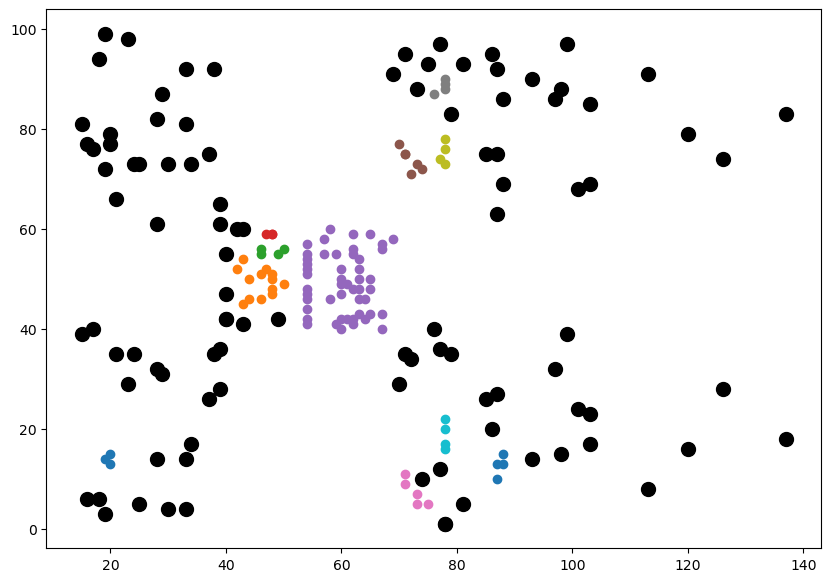

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(x[clusters==-1]["Annual Income (k$)"], x[clusters==-1]["Spending Score (1-100)"], s=100, c="black")
plt.scatter(x[clusters==0]["Annual Income (k$)"], x[clusters==0]["Spending Score (1-100)"])
plt.scatter(x[clusters==1]["Annual Income (k$)"], x[clusters==1]["Spending Score (1-100)"])
plt.scatter(x[clusters==2]["Annual Income (k$)"], x[clusters==2]["Spending Score (1-100)"])
plt.scatter(x[clusters==3]["Annual Income (k$)"], x[clusters==3]["Spending Score (1-100)"])
plt.scatter(x[clusters==4]["Annual Income (k$)"], x[clusters==4]["Spending Score (1-100)"])
plt.scatter(x[clusters==5]["Annual Income (k$)"], x[clusters==5]["Spending Score (1-100)"])
plt.scatter(x[clusters==6]["Annual Income (k$)"], x[clusters==6]["Spending Score (1-100)"])
plt.scatter(x[clusters==7]["Annual Income (k$)"], x[clusters==7]["Spending Score (1-100)"])
plt.scatter(x[clusters==8]["Annual Income (k$)"], x[clusters==8]["Spending Score (1-100)"])
plt.scatter(x[clusters==9]["Annual Income (k$)"], x[clusters==9]["Spending Score (1-100)"])
plt.scatter(x[clusters==10]["Annual Income (k$)"], x[clusters==10]["Spending Score (1-100)"])

## All the black points are outliers

The idea is to calculate the average of the distances of every point to its k nearest neighbors. The value of k will be specified by the user and coresponds to MinPts. Next, these k-distances are plotted in ascending order. The aim is to determine the "knee", which coresponds to the optimal epsilon parameter. A knee correspomds to a threshold where a sharp change occurs along the k-distance curve.

In [9]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3) # n_neighbors = min_number of points
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

We can calculate the distance from each point to its nearest neighbor using the NearestNeighbors. THe point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors point and the other which contains the index for each of these points.

In [10]:
distances

array([[ 0.        ,  2.23606798,  7.21110255],
       [ 0.        ,  4.12310563,  5.38516481],
       [ 0.        ,  2.        ,  4.24264069],
       [ 0.        ,  1.41421356,  4.        ],
       [ 0.        ,  2.23606798,  6.40312424],
       [ 0.        ,  1.41421356,  3.16227766],
       [ 0.        ,  2.        ,  3.16227766],
       [ 0.        ,  5.09901951,  6.40312424],
       [ 0.        ,  3.16227766,  4.24264069],
       [ 0.        ,  4.47213595,  5.09901951],
       [ 0.        ,  1.41421356,  1.41421356],
       [ 0.        ,  4.12310563,  5.09901951],
       [ 0.        ,  1.41421356,  2.        ],
       [ 0.        ,  2.        ,  3.16227766],
       [ 0.        ,  1.41421356,  2.        ],
       [ 0.        ,  2.        ,  4.24264069],
       [ 0.        ,  3.        ,  6.32455532],
       [ 0.        ,  6.32455532,  7.61577311],
       [ 0.        ,  5.83095189,  6.08276253],
       [ 0.        ,  4.12310563,  6.40312424],
       [ 0.        ,  3.        ,  5.   

In [11]:
indices

array([[  0,   4,  16],
       [  1,   3,  15],
       [  2,   6,   8],
       [  3,   5,  13],
       [  4,   0,  16],
       [  5,   3,  13],
       [  6,   2,   8],
       [  7,  11,  19],
       [  8,   6,   2],
       [  9,   5,  13],
       [ 10,  14,  12],
       [ 11,  19,   7],
       [ 12,  10,  14],
       [ 13,  15,   5],
       [ 14,  10,  12],
       [ 15,  13,   5],
       [ 16,  20,  18],
       [ 17,   9,  21],
       [ 18,  26,  20],
       [ 19,  11,   7],
       [ 20,  16,  26],
       [ 21,  23,   9],
       [ 22,  30,   8],
       [ 23,  21,  31],
       [ 24,  34,  36],
       [ 25,  29,  35],
       [ 26,  28,  20],
       [ 27,  17,  43],
       [ 28,  26,  18],
       [ 29,  25,  33],
       [ 30,  32,  22],
       [ 31,  37,  23],
       [ 32,  30,  22],
       [ 33,  41,  29],
       [ 34,  36,  24],
       [ 35,  25,  39],
       [ 36,  34,  24],
       [ 37,  39,  31],
       [ 38,  44,  40],
       [ 39,  37,  35],
       [ 40,  42,  44],
       [ 41,  33

In [12]:
distances = np.sort(distances, axis=-0)
distances

array([[ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  1.        ,  1.        ],
       [ 0.        ,  1.        ,  1.        ],
       [ 0.        ,  1.        ,  1.        ],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.        ,  1.414

In [13]:
distances = distances[:,1]

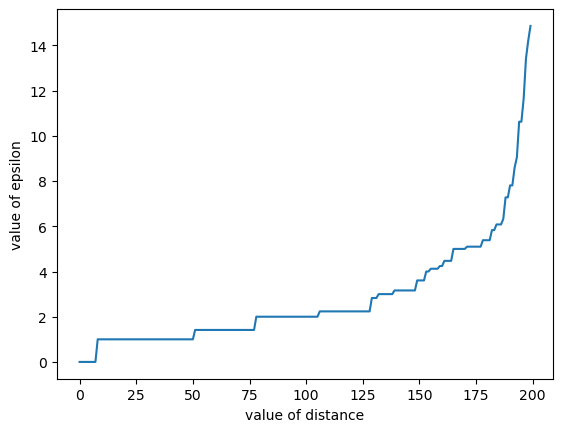

In [14]:
plt.plot(distances) 
plt.xlabel("value of distance") 
plt.ylabel("value of epsilon")
plt.show()

### The optimal value for epsilon will be found at the point of maximum curvature

In [15]:
dbscan = DBSCAN(eps=5, min_samples=3)
clusters=dbscan.fit_predict(x)
clusters

array([-1,  1,  0,  1, -1,  1,  0, -1,  0,  1,  2, -1,  2,  1,  2,  1,  3,
       -1, -1, -1,  3,  4, -1,  4,  5, -1,  3, -1,  3, -1, -1,  4, -1, -1,
        5, -1,  5,  4, -1,  4, -1, -1, -1,  6, -1,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7, -1,  8, -1,  7,  9,  8,  9,  8, -1,  8,  9,  7,
        9,  8,  9,  8,  9,  7, 10,  7,  9,  7, 10,  8,  9,  7,  9,  7,  9,
        8,  9,  7,  9,  8,  9,  8, 10,  7,  9,  7, -1, -1, -1, -1, -1, -1,
       11, -1, 11, -1, 11, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [18]:
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

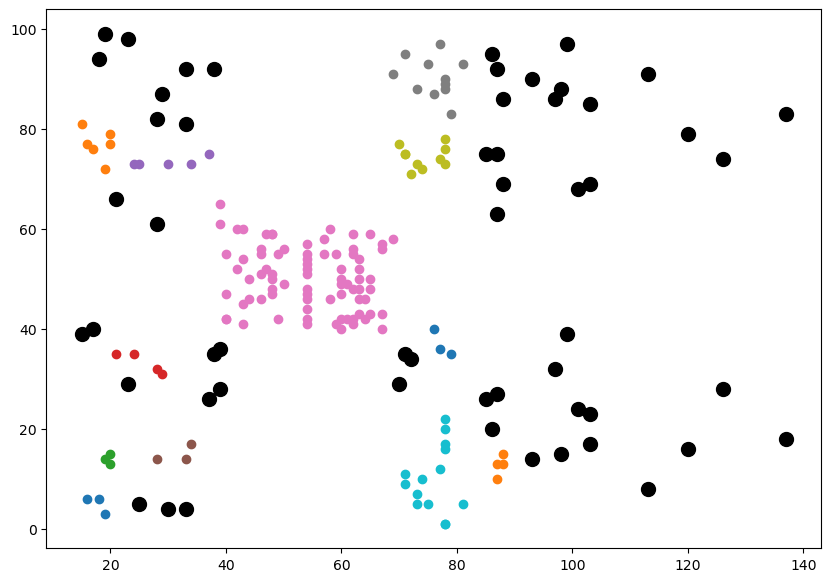

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(x[clusters==-1]["Annual Income (k$)"], x[clusters==-1]["Spending Score (1-100)"], s=100, c="black")
plt.scatter(x[clusters==0]["Annual Income (k$)"], x[clusters==0]["Spending Score (1-100)"])
plt.scatter(x[clusters==1]["Annual Income (k$)"], x[clusters==1]["Spending Score (1-100)"])
plt.scatter(x[clusters==2]["Annual Income (k$)"], x[clusters==2]["Spending Score (1-100)"])
plt.scatter(x[clusters==3]["Annual Income (k$)"], x[clusters==3]["Spending Score (1-100)"])
plt.scatter(x[clusters==4]["Annual Income (k$)"], x[clusters==4]["Spending Score (1-100)"])
plt.scatter(x[clusters==5]["Annual Income (k$)"], x[clusters==5]["Spending Score (1-100)"])
plt.scatter(x[clusters==6]["Annual Income (k$)"], x[clusters==6]["Spending Score (1-100)"])
plt.scatter(x[clusters==7]["Annual Income (k$)"], x[clusters==7]["Spending Score (1-100)"])
plt.scatter(x[clusters==8]["Annual Income (k$)"], x[clusters==8]["Spending Score (1-100)"])
plt.scatter(x[clusters==9]["Annual Income (k$)"], x[clusters==9]["Spending Score (1-100)"])
plt.scatter(x[clusters==10]["Annual Income (k$)"], x[clusters==10]["Spending Score (1-100)"])
plt.scatter(x[clusters==11]["Annual Income (k$)"], x[clusters==11]["Spending Score (1-100)"])

    Lower value of epsilon leads to no formation of clusters
    Higher value of epsilon leads to formation of only one cluster